In [1]:
import pandas as pd

df = pd.read_csv("../data/delaney-processed.csv")
df

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


In [3]:
df = df.loc[:, ["Compound ID", "smiles", "measured log solubility in mols per litre"]]
df.columns = ["name", "smiles", "logS"]
df

,name,smiles,logS
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.770
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.300
2,citral,CC(C)=CCCC(C)=CC(=O),-2.060
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.870
4,Thiophene,c1ccsc1,-1.330
...,...,...,...
1123,halothane,FC(F)(F)C(Cl)Br,-1.710
1124,Oxamyl,CNC(=O)ON=C(SC)C(=O)N(C)C,0.106
1125,Thiometon,CCSCCSP(=S)(OC)OC,-3.091
1126,2-Methylbutane,CCC(C)C,-3.180


In [13]:
import deepchem as dc

featurizer = dc.feat.MordredDescriptors(ignore_3D=True)
mordred_feat = featurizer.featurize(df.loc[:, "smiles"])
mordred_feat = pd.DataFrame(mordred_feat)
mordred_feat

,0,1,2,3,4,5,6,7,8,9,...,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612
0,24.334008,19.893690,0.0,0.0,41.096001,2.432237,4.864474,41.096001,1.284250,4.378055,...,10.411178,68.045415,457.158411,7.748448,3080.0,56.0,164.0,195.0,12.333333,7.250000
1,11.451608,10.427368,0.0,0.0,19.259416,2.328912,4.577094,19.259416,1.283961,3.629487,...,9.325721,60.100855,201.078979,7.733807,384.0,18.0,74.0,84.0,4.694444,3.388889
2,7.399237,7.388977,0.0,0.0,12.133645,2.047810,4.095621,12.133645,1.103059,3.219224,...,8.131825,38.565088,152.120115,5.634078,194.0,9.0,42.0,41.0,5.472222,2.750000
3,18.101696,12.688772,0.0,0.0,30.943225,2.534800,5.069601,30.943225,1.406510,4.078270,...,10.370455,57.194078,278.109550,7.725265,963.0,42.0,128.0,159.0,4.388889,4.694444
4,3.535534,3.535534,0.0,0.0,6.472136,2.000000,3.618034,6.472136,1.294427,2.525424,...,7.147559,41.004802,84.003371,9.333708,15.0,0.0,20.0,20.0,1.250000,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,4.876567,5.209852,0.0,0.0,6.602720,2.175328,4.350655,6.602720,0.943246,2.792781,...,8.466531,34.219913,195.890224,24.486278,42.0,6.0,30.0,30.0,5.173611,1.500000
1124,9.549067,9.862368,0.0,0.0,16.175514,2.220061,4.440122,16.175514,1.155394,3.475164,...,8.896588,43.998691,219.067762,8.113621,337.0,17.0,58.0,62.0,7.444444,3.472222
1125,7.937093,8.164337,0.0,0.0,14.324780,2.215208,4.430416,14.324780,1.193732,3.315673,...,8.744010,41.128861,245.997179,9.111007,234.0,13.0,48.0,50.0,5.812500,3.125000
1126,3.047207,3.305183,0.0,0.0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,6.834109,27.254130,72.093900,4.240818,18.0,2.0,16.0,14.0,3.361111,1.333333


In [14]:
new_columns = []
for i in range(mordred_feat.shape[1]):
    new_columns.append(f"mordred_{i}")
mordred_feat.columns = new_columns

In [15]:
df_mordred = pd.concat([df, mordred_feat], axis=1)
df_mordred

,name,smiles,logS,mordred_0,mordred_1,mordred_2,mordred_3,mordred_4,mordred_5,mordred_6,...,mordred_1603,mordred_1604,mordred_1605,mordred_1606,mordred_1607,mordred_1608,mordred_1609,mordred_1610,mordred_1611,mordred_1612
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.770,24.334008,19.893690,0.0,0.0,41.096001,2.432237,4.864474,...,10.411178,68.045415,457.158411,7.748448,3080.0,56.0,164.0,195.0,12.333333,7.250000
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.300,11.451608,10.427368,0.0,0.0,19.259416,2.328912,4.577094,...,9.325721,60.100855,201.078979,7.733807,384.0,18.0,74.0,84.0,4.694444,3.388889
2,citral,CC(C)=CCCC(C)=CC(=O),-2.060,7.399237,7.388977,0.0,0.0,12.133645,2.047810,4.095621,...,8.131825,38.565088,152.120115,5.634078,194.0,9.0,42.0,41.0,5.472222,2.750000
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.870,18.101696,12.688772,0.0,0.0,30.943225,2.534800,5.069601,...,10.370455,57.194078,278.109550,7.725265,963.0,42.0,128.0,159.0,4.388889,4.694444
4,Thiophene,c1ccsc1,-1.330,3.535534,3.535534,0.0,0.0,6.472136,2.000000,3.618034,...,7.147559,41.004802,84.003371,9.333708,15.0,0.0,20.0,20.0,1.250000,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,halothane,FC(F)(F)C(Cl)Br,-1.710,4.876567,5.209852,0.0,0.0,6.602720,2.175328,4.350655,...,8.466531,34.219913,195.890224,24.486278,42.0,6.0,30.0,30.0,5.173611,1.500000
1124,Oxamyl,CNC(=O)ON=C(SC)C(=O)N(C)C,0.106,9.549067,9.862368,0.0,0.0,16.175514,2.220061,4.440122,...,8.896588,43.998691,219.067762,8.113621,337.0,17.0,58.0,62.0,7.444444,3.472222
1125,Thiometon,CCSCCSP(=S)(OC)OC,-3.091,7.937093,8.164337,0.0,0.0,14.324780,2.215208,4.430416,...,8.744010,41.128861,245.997179,9.111007,234.0,13.0,48.0,50.0,5.812500,3.125000
1126,2-Methylbutane,CCC(C)C,-3.180,3.047207,3.305183,0.0,0.0,5.226252,1.847759,3.695518,...,6.834109,27.254130,72.093900,4.240818,18.0,2.0,16.0,14.0,3.361111,1.333333


In [16]:
df_mordred.to_csv("../data/delaney-mordred.csv", index=False)

In [20]:
from rdkit import Chem

bitI_rdkit = {}
smi = df.loc[0, "smiles"]
mol = Chem.MolFromSmiles(smi)
fp_rdkit = Chem.RDKFingerprint(mol, bitInfo=bitI_rdkit)

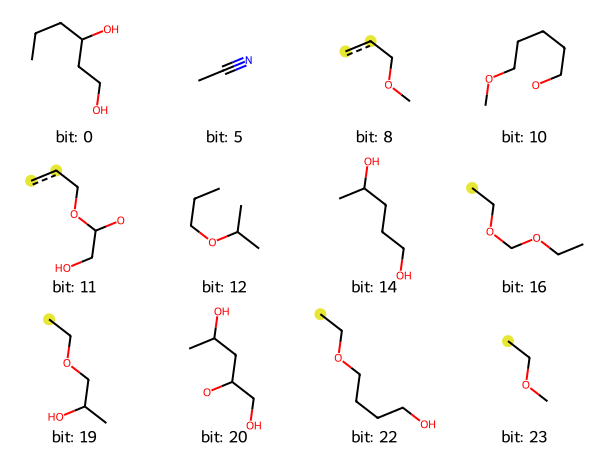

In [22]:
from rdkit.Chem import Draw

rdkit_turples = ((mol, bit, bitI_rdkit) for bit in list(bitI_rdkit.keys())[:12])
Draw.DrawRDKitBits(
    rdkit_turples,
    molsPerRow=4,
    legends=["bit: " + str(x) for x in list(bitI_rdkit.keys())[:12]],
)

In [37]:
rdkitfp_feat = []
for smi in df["smiles"].values:
    mol = Chem.MolFromSmiles(smi)
    fp_rdkit = Chem.RDKFingerprint(mol, bitInfo=bitI_rdkit)
    rdkitfp_feat.append(fp_rdkit.ToList())
rdkitfp_feat = pd.DataFrame(rdkitfp_feat)
rdkitfp_feat

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,1,1,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1124,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1125,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
rdkitfp_feat.columns = [f"rdkitfp_{i}" for i in range(rdkitfp_feat.shape[1])]
rdkitfp_feat

,rdkitfp_0,rdkitfp_1,rdkitfp_2,rdkitfp_3,rdkitfp_4,rdkitfp_5,rdkitfp_6,rdkitfp_7,rdkitfp_8,rdkitfp_9,...,rdkitfp_2038,rdkitfp_2039,rdkitfp_2040,rdkitfp_2041,rdkitfp_2042,rdkitfp_2043,rdkitfp_2044,rdkitfp_2045,rdkitfp_2046,rdkitfp_2047
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,1,1,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1124,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1125,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_rdkitfp = pd.concat([df, rdkitfp_feat], axis=1)
df_rdkitfp.to_csv("../data/delaney-rdkitfp.csv", index=False)